<a href="https://colab.research.google.com/github/samantha-olinsky/MA322-Python/blob/main/MLR/MLR_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from scipy import stats

### Extraction

In [2]:
# if we don't wish to use all of the data in a dataframe,
# we can EXTRACT the features we want

# extraction (or subsetting) is the process of
# taking only SOME of the data from a dataframe

In [3]:
# lets take a look at the rent dataset

# first we read it in
rent_df = pd.read_csv('https://raw.githubusercontent.com/mlhwang/ma322/master/rent.csv')

# then we can preview the dataframe
print(rent_df)

     Unnamed: 0  rent  size
0             1  1730  1390
1             2  1840  1430
2             3  1570  1380
3             4  1720  1440
4             5  1240   980
..          ...   ...   ...
995         996  1180   990
996         997  1610  1320
997         998  1830  1720
998         999  1310  1230
999        1000  1680  1280

[1000 rows x 3 columns]


In [4]:
# you may notice that unnamed feature/column
# it is providing us with the index number of each example/row

# we don't need that information
# since Python gives us the index numbers already
# (just off by one due to index starting at 0 instead of 1)

# let's EXTRACT just the rent and size columns
# create a new variable to store just those 2 features
rent_df2 = rent_df[['rent', 'size']]  #double brackets because it's a list

print(rent_df2)

     rent  size
0    1730  1390
1    1840  1430
2    1570  1380
3    1720  1440
4    1240   980
..    ...   ...
995  1180   990
996  1610  1320
997  1830  1720
998  1310  1230
999  1680  1280

[1000 rows x 2 columns]


### *Multiple* Linear Regression: **MLR**

### **Additional MLR Example:** Sales, Radio, and Newspaper Ads

In [5]:
# load in the dataset to a dataframe
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_oNaK_QKTtFQYdh7Pl17_prektSRuDVwRD71Vo8daBd0biyeG-Oiic4dMN_EL--voDWHAc5MmXNYH/pub?gid=0&single=true&output=csv')

In [6]:
print(df)

    radio  newspaper  sales
0       0         40    973
1       0         40   1119
2      25         25    875
3      25         25    625
4      30         30    910
5      30         30    971
6      35         35    931
7      35         35   1177
8      40         25    882
9      40         25    982
10     45         45   1628
11     45         45   1577
12     50          0   1044
13     50          0    914
14     55         25   1329
15     55         25   1330
16     60         30   1405
17     60         30   1436
18     65         35   1521
19     65         35   1741
20     70         40   1866
21     70         40   1717


As a result of the above, the dataframe `df` has the `sales`, `radio`, and
`newspaper` Ads data loaded in.

Lets look at the correlation coefficient, r , and the scatterplot for Newspaper and Sales.


In [7]:
# calculate the correlation coefficient, r , (and the p-value)
print(stats.pearsonr(df['newspaper'], df['sales']))

(0.502113451911194, 0.01725439983504393)


Text(0.5, 1.0, 'Newspaper Expenditures and Sales')

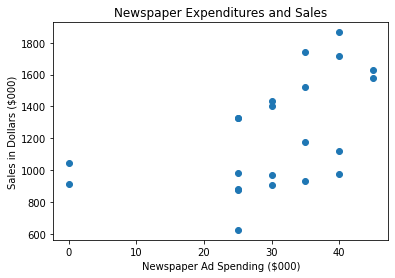

In [8]:
# labeled scatterplot
plt.scatter(df['newspaper'], df['sales'])
plt.xlabel("Newspaper Ad Spending ($000)")
plt.ylabel("Sales in Dollars ($000)")
plt.title("Newspaper Expenditures and Sales")

Now lets look at the correlation coefficient, r , and the scatter plot for ***Radio*** and Sales.


In [9]:
# calculate the correlation coefficient, r , (and the p-value)
print(stats.pearsonr(df['radio'], df['sales']))

(0.6966084158205958, 0.00031610836765907913)


Text(0.5, 1.0, 'Radio Ad Expenditures and Sales')

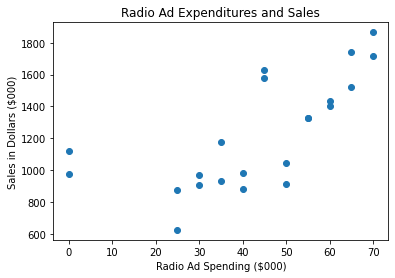

In [10]:
# labeled scatterplot
plt.scatter(df['radio'], df['sales'])
plt.xlabel("Radio Ad Spending ($000)")
plt.ylabel("Sales in Dollars ($000)")
plt.title("Radio Ad Expenditures and Sales")

In [11]:
# correlation matrix
print(df.corr())

              radio  newspaper     sales
radio      1.000000  -0.092127  0.696608
newspaper -0.092127   1.000000  0.502113
sales      0.696608   0.502113  1.000000


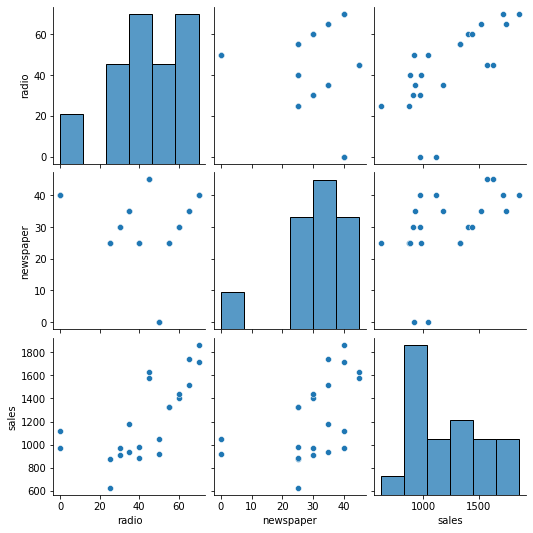

In [12]:
# scatterplot matrix
import seaborn as sns
print(sns.pairplot(df))

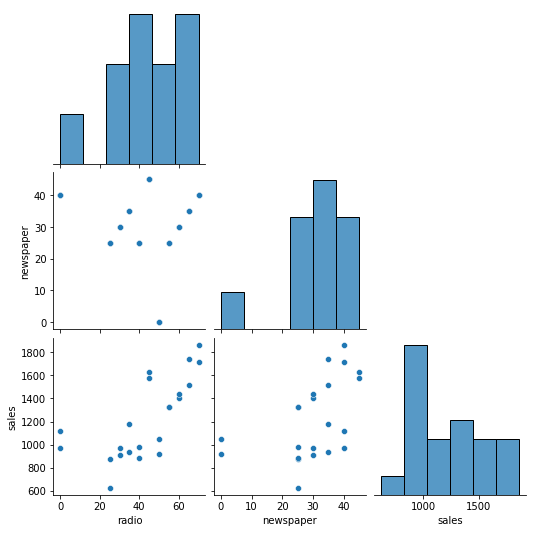

In [13]:
# only view the bottom left corner
print(sns.pairplot(df, corner=True))

In [20]:
# run the regression model
X = df[['newspaper', 'radio']]
Y = df['sales']
model = linear_model.LinearRegression().fit(X,Y)
print("Coef's:", model.coef_)
print('Intercept:',model.intercept_)

Coef's: [16.79527808 13.08068096]
Intercept: 156.43043453198675


In [ ]:
# therefore in context,
# sales_hat = 156.43 + 16.80*(newspaper) + 13.08*(radio)

In [22]:
# making predictions
print("Spending 30,000 on Radio ads and 35,000 on Newspaper predicts sales of:", model.predict([[30,35]]))
print("Spending 35,000 on Radio ads and 45,000 on Newspaper predicts sales of:", model.predict([[35,45]]))

Spending 30,000 on Radio ads and 35,000 on Newspaper predicts sales of: [1118.11261036]
Spending 35,000 on Radio ads and 45,000 on Newspaper predicts sales of: [1332.89581032]


In [27]:
# calculate R^2

# storing all the predictions for the all the sizes as a variable
sales_predictions = model.predict(df[['newspaper', 'radio']])

# putting the parameters into the function
print(metrics.r2_score(df['sales'], sales_predictions))

0.8086923523509826
